# Sample use of the sun topic model 

In [10]:
import numpy as np
from sun_topicmodel import suntopic

In [23]:
# Generate random data as the 'embeddings' for the 'documents' in the corpus
np.random.seed(2024)
W_t = np.random.rand(1000, 5)
H_t = np.random.rand(5, 1000)
X = np.dot(W_t, H_t) + np.random.rand(1000, 1000)*0.01
coeff_true =  np.random.rand(5)
Y = np.dot(W_t, coeff_true) + np.random.rand(1000)*0.01
print(f"coeff_true: {coeff_true}")

coeff_true: [0.60869179 0.36995137 0.03427113 0.08748622 0.76078191]


In [20]:
# do train, estimation split 
X_train = X[:, :800]
X_est = X[:, 800:]
Y_train = Y
Y_est = np.random.rand(5)

# Initialize and fit the model
model = suntopic(Y = Y_train, X = X_train, alpha = 0.5, num_bases=3, random_state = 2024)
model.fit()
model.summary()


Suntopic Model Summary
Number of topics:  3
Alpha:  0.5
Data shape:  (100, 801)
Model:  <sun_topicmodel.snmf.SNMF object at 0x16b189650>
Random initialization state:  2024
Prediction coefficients:  [0.54372236 0.38932214 0.86491281]


In [35]:
# Use cross validation for finding optimal hyperparameters: number of bases and alpha 
model.hyperparam_cv(alpha_range = np.linspace(0.1,0.9,9), num_bases_range = np.arange(2,10),  cv_folds = 5, random_state=2024)

In [36]:
model.cv_summary()

Cross-Validation Summary
Alpha candidate values:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Number of topics:  [2 3 4 5 6 7 8 9]
Number of folds:  5
CV Random state:  2024
Top 1 hyperparam combinations - num_bases: 9.00, alpha: 0.20, MSE: 0.0010
Top 2 hyperparam combinations - num_bases: 8.00, alpha: 0.20, MSE: 0.0010
Top 3 hyperparam combinations - num_bases: 9.00, alpha: 0.30, MSE: 0.0010


In [39]:
# Use parallelization to speed up the hyperparameter search
model.hyperparam_cv(alpha_range = np.linspace(0.1,0.9,9), num_bases_range = np.arange(2,10),  cv_folds = 5, random_state=2024,
                    parallel=True)
model.cv_summary()

Cross-Validation Summary
Alpha candidate values:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Number of topics:  [2 3 4 5 6 7 8 9]
Number of folds:  5
CV Random state:  2024
Top 1 hyperparam combinations - num_bases: 9.00, alpha: 0.20, MSE: 0.0010
Top 2 hyperparam combinations - num_bases: 8.00, alpha: 0.20, MSE: 0.0010
Top 3 hyperparam combinations - num_bases: 9.00, alpha: 0.30, MSE: 0.0010


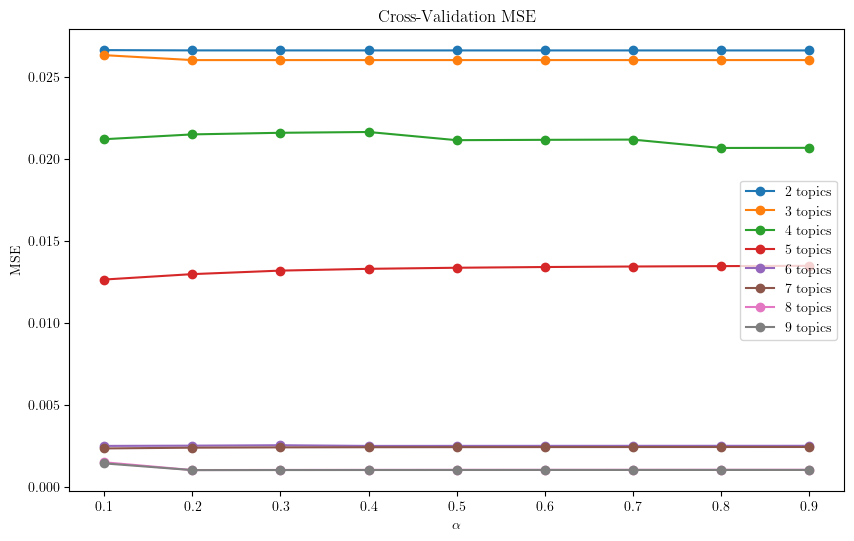

In [40]:
model.cv_mse_plot()